**DeepONet using DeepXDE module**

In [ ]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

Data loading

In [14]:
datastore = h5py.File("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/trials_many_alldata_new_eqution2.h5", 'r')
data_I = np.array(np.array(datastore["I"]))

data_c = np.array(np.array(datastore["c"]))
data_h = np.array(np.array(datastore["h"]))
t = np.linspace(0, 1, 601).reshape(601, 1)

Train-test split

In [15]:
train_label, test_label = train_test_split(range(len(data_I)), test_size=0.25, random_state=42)

data_i_train = data_I[train_label,:]
data_i_test = data_I[test_label,:]

data_c_train = data_c[train_label,:]
data_c_test = data_c[test_label,:]

data_h_train = data_h[train_label,:]
data_h_test = data_h[test_label,:]

In [16]:
# d_train = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_train.npz", allow_pickle=True)
# X_train = (d_train["X"][0].astype(np.float32), d_train["X"][1].astype(np.float32))
# y_train = d_train["y"].astype(np.float32)

In [17]:
X_train = (data_i_train.astype(np.float32), t.astype(np.float32))
y_train_c = data_c_train.astype(np.float32)

In [18]:
# d_test = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_test.npz", allow_pickle=True)
# X_test = (d_test["X"][0].astype(np.float32), d_test["X"][1].astype(np.float32))
# y_test = d_test["y"].astype(np.float32)

In [19]:
X_test = (data_i_test.astype(np.float32), t.astype(np.float32))
y_test_c = data_c_test.astype(np.float32)

In [20]:
data_c = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train_c, X_test=X_test, y_test=y_test_c
)

In [21]:
m = 601
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 200, 200, 200],
    [dim_x, 200, 200, 200],
    "relu",
    "Glorot normal",
)

In [22]:
def compute_parameters(layers):
    params = 0
    for i in range(len(layers) - 1):
        params += layers[i] * layers[i + 1]  # Weights
        params += layers[i + 1]             # Biases
    return params

branch_layers = [m, 200, 200, 200]
trunk_layers = [dim_x, 200, 200, 200]

branch_params = compute_parameters(branch_layers)
trunk_params = compute_parameters(trunk_layers)
total_params = branch_params + trunk_params
print(f"Total trainable parameters: {total_params}, branch parameters: {branch_params}, trunk parameters: {trunk_params}")


Total trainable parameters: 281600, branch parameters: 200800, trunk parameters: 80800


In [23]:
model_c = dde.Model(data_c, net)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_c.compile("adam", lr=0.01)
losshistory_c, train_state_c = model_c.train(iterations=1000, display_every=100)

Compiling model...
'compile' took 0.000441 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.82e+01]    [1.81e+01]    []  
100       [2.44e+00]    [2.40e+00]    []  
200       [1.35e+00]    [1.34e+00]    []  
300       [1.06e+00]    [1.06e+00]    []  
400       [9.33e-01]    [9.31e-01]    []  
500       [9.42e-01]    [9.36e-01]    []  
600       [1.23e+00]    [1.23e+00]    []  
700       [8.32e-01]    [8.26e-01]    []  
800       [1.03e+00]    [1.01e+00]    []  
900       [8.17e-01]    [8.05e-01]    []  
1000      [7.99e-01]    [7.90e-01]    []  

Best model at step 1000:
  train loss: 7.99e-01
  test loss: 7.90e-01
  test metric: []

'train' took 1016.174297 s



In [24]:
y_train_h = data_h_train.astype(np.float32)
y_test_h = data_h_test.astype(np.float32)

In [25]:
data_h = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train_h, X_test=X_test, y_test=y_test_h
)

In [26]:
m = 601
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 200, 200, 200],
    [dim_x, 200, 200, 200],
    "relu",
    "Glorot normal",
)

In [27]:
branch_layers = [m, 200, 200, 200]
trunk_layers = [dim_x, 200, 200, 200]

branch_params = compute_parameters(branch_layers)
trunk_params = compute_parameters(trunk_layers)
total_params = branch_params + trunk_params
print(f"Total trainable parameters: {total_params}, branch parameters: {branch_params}, trunk parameters: {trunk_params}")


Total trainable parameters: 281600, branch parameters: 200800, trunk parameters: 80800


In [28]:
model_h = dde.Model(data_h, net)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_h.compile("adam", lr=0.01)
losshistory_h, train_state_h = model_h.train(iterations=1000, display_every=100)

Compiling model...
'compile' took 0.000456 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.53e-01]    [1.55e-01]    []  
100       [2.36e-02]    [2.39e-02]    []  
200       [1.76e-02]    [1.79e-02]    []  
300       [1.55e-02]    [1.57e-02]    []  
400       [1.42e-02]    [1.44e-02]    []  
500       [1.23e-02]    [1.23e-02]    []  
600       [1.03e-02]    [1.05e-02]    []  
700       [1.48e-02]    [1.50e-02]    []  
800       [8.76e-03]    [8.91e-03]    []  
900       [7.91e-03]    [8.02e-03]    []  
1000      [7.65e-03]    [7.74e-03]    []  

Best model at step 1000:
  train loss: 7.65e-03
  test loss: 7.74e-03
  test metric: []

'train' took 1005.527644 s



In [32]:
len(data_h_test)

27886

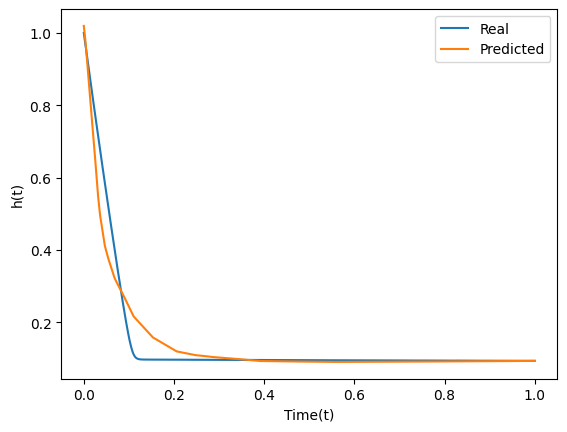

In [45]:
n = np.random.randint(0, len(data_h_test))
pred_h = model_h.predict((data_i_test[n].reshape(1, -1), t))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

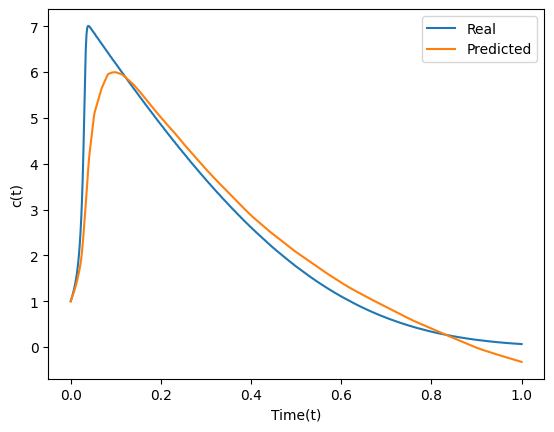

In [48]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict((data_i_test[n].reshape(1, -1), t))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()